<a href="https://colab.research.google.com/github/prathamesh0902/natural-language-processing/blob/STATS-500/STATS_500_Hw_6_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prathamesh Joshi**
STATS 500-Hw 6

**Problem 1**

In [ ]:
install.packages("faraway")
library(faraway)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("faraway"):
“installation of package ‘faraway’ had non-zero exit status”


In [ ]:
data(sat)

In [ ]:
#plot(sat)

In [ ]:
#Ordinary Least Square Method
mdl1 <- lm(total ~ takers+ ratio+ salary+ expend, data = sat)
summary(mdl1)


Call:
lm(formula = total ~ takers + ratio + salary + expend, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.531 -20.855  -1.746  15.979  66.571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1045.9715    52.8698  19.784  < 2e-16 ***
takers        -2.9045     0.2313 -12.559 2.61e-16 ***
ratio         -3.6242     3.2154  -1.127    0.266    
salary         1.6379     2.3872   0.686    0.496    
expend         4.4626    10.5465   0.423    0.674    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.7 on 45 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R-squared:  0.809 
F-statistic: 52.88 on 4 and 45 DF,  p-value: < 2.2e-16


**Ans 1.a)**
Here β0 and β1 are significant.

In [ ]:
library(MASS)

In [ ]:
#Least Absolute Deviations Method
mdl3 <- rq(total ~ takers+ ratio+ salary+ expend, data = sat)
summary(mdl3)


Call: rq(formula = total ~ takers + ratio + salary + expend, data = sat)

tau: [1] 0.5

Coefficients:
            coefficients lower bd   upper bd  
(Intercept) 1090.89886    920.17149 1151.85075
takers        -3.13961     -3.38485   -2.66479
ratio         -7.26632    -10.73796    1.62341
salary         3.18313     -0.15788    5.41909
expend        -0.79753     -8.88001   20.92522

**Ans 1.b)**
For the Least Absolute Deviation model the coeffiecients for "ratio", "salary" and "expend" have 0 in their confidence interval. It states that the significance of these coefficients is low and hence β0 and β1 are significant. 

In [ ]:
install.packages("quantreg")
library(quantreg)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Huber's Method
mdl2 <- rlm(total ~ takers+ ratio+ salary+ expend, data = sat)
summary(mdl2)


Call: rlm(formula = total ~ takers + ratio + salary + expend, data = sat)
Residuals:
    Min      1Q  Median      3Q     Max 
-92.510 -17.701  -1.002  15.015  77.058 

Coefficients:
            Value     Std. Error t value  
(Intercept) 1060.2074   49.8845    21.2533
takers        -2.9778    0.2182   -13.6470
ratio         -5.1254    3.0339    -1.6894
salary         2.0933    2.2525     0.9293
expend         3.9158    9.9510     0.3935

Residual standard error: 25.58 on 45 degrees of freedom

In [ ]:
2 * pt(-(abs(21.2533)), 45)
2 * pt(-(abs(-13.6470)), 45)
2 * pt(-(abs(-1.6894)), 45)
2 * pt(-(abs(0.9293)), 45)
2 * pt(-(abs(0.3935)), 45)

[1] 4.243614e-25

[1] 1.329075e-17

[1] 0.09806088

[1] 0.357692

[1] 0.6958085

**Ans 1.c)** The p-values for β0 and β1 are < α (5%). Therefore they are significant.

_____________________
**Problem 2**

In [ ]:
data(cheddar)

In [ ]:
mdl5 <- lm(taste ~ . , data = cheddar)
summary(mdl5)


Call:
lm(formula = taste ~ ., data = cheddar)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.390  -6.612  -1.009   4.908  25.449 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -28.8768    19.7354  -1.463  0.15540   
Acetic        0.3277     4.4598   0.073  0.94198   
H2S           3.9118     1.2484   3.133  0.00425 **
Lactic       19.6705     8.6291   2.280  0.03108 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.13 on 26 degrees of freedom
Multiple R-squared:  0.6518,	Adjusted R-squared:  0.6116 
F-statistic: 16.22 on 3 and 26 DF,  p-value: 3.81e-06


In [ ]:
a <- seq(1,30)
cheddar$time <- a
#summary(cheddar)

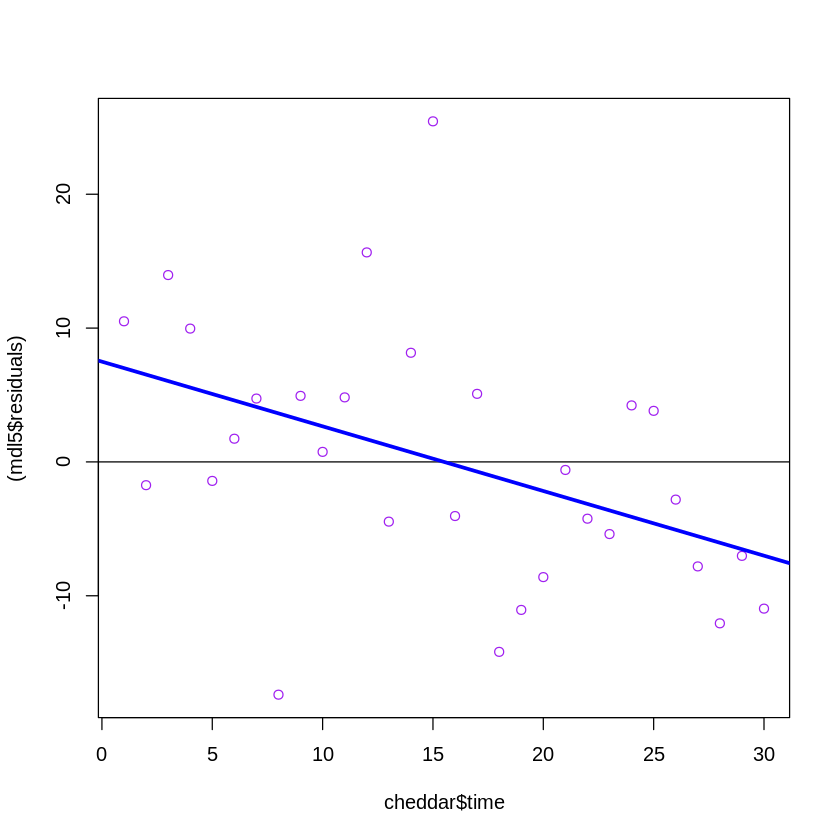

In [ ]:
#Ploting errors vs time
plot(cheddar$time, (mdl5$residuals), col = "purple" )
abline(0,0)
abline(lm((mdl5$residuals)~cheddar$time),col = "blue", lwd = 3)

**Ans 2.a)**

The plot shows that the errors vary according to time. Hence we may consider time as a parameter for the model.

In [ ]:
#Fit a GLS model 
library(nlme)
mdl6 <- gls(taste ~ Acetic + H2S + Lactic, correlation = corAR1(form = ~time) , data = cheddar)
summary(mdl6)

Generalized least squares fit by REML
  Model: taste ~ Acetic + H2S + Lactic 
  Data: cheddar 
     AIC      BIC  logLik
  214.94 222.4886 -101.47

Correlation Structure: AR(1)
 Formula: ~time 
 Parameter estimate(s):
      Phi 
0.2641944 

Coefficients:
                 Value Std.Error   t-value p-value
(Intercept) -30.332472 20.273077 -1.496195  0.1466
Acetic        1.436411  4.876581  0.294553  0.7707
H2S           4.058880  1.314283  3.088284  0.0047
Lactic       15.826468  9.235404  1.713674  0.0985

 Correlation: 
       (Intr) Acetic H2S   
Acetic -0.899              
H2S     0.424 -0.395       
Lactic  0.063 -0.416 -0.435

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.64546468 -0.63861716 -0.06641714  0.52255676  2.41323021 

Residual standard error: 10.33276 
Degrees of freedom: 30 total; 26 residual

In [ ]:
intervals(mdl6)

Approximate 95% confidence intervals

 Coefficients:
                 lower       est.     upper
(Intercept) -72.004379 -30.332472 11.339436
Acetic       -8.587544   1.436411 11.460367
H2S           1.357332   4.058880  6.760427
Lactic       -3.157177  15.826468 34.810113

 Correlation structure:
         lower      est.     upper
Phi -0.1690759 0.2641944 0.6118917

 Residual standard error:
    lower      est.     upper 
 7.626441 10.332756 13.999433 

**Ans 2.b)**
The phi values' confidence interval lies b/w 0.26 to 0.611. This does not have 0 in them. Therefore the errors are not collinear.

In [ ]:
#Fit a OLS model with time variable
mdl7 <- lm(taste ~ . , data = cheddar)
summary(mdl7)


Call:
lm(formula = taste ~ ., data = cheddar)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.3523  -4.9735  -0.5089   4.8531  23.1311 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -36.6127    17.9845  -2.036  0.05250 . 
Acetic        4.1275     4.2556   0.970  0.34139   
H2S           3.5387     1.1315   3.127  0.00444 **
Lactic       17.9527     7.7875   2.305  0.02973 * 
time         -0.5459     0.2043  -2.672  0.01306 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.112 on 25 degrees of freedom
Multiple R-squared:  0.7291,	Adjusted R-squared:  0.6858 
F-statistic: 16.83 on 4 and 25 DF,  p-value: 8.205e-07


**Ans 2.c)** In the new model for OLS the "time" predictor is not significant as the p value <α (5%).

**Ans 2.d)**
In the OLS we take time as a predictor. In the GLS model we take the Variance of error as Σ and the variations in errors with time is recorded in Σ matrix.
The variation of error in OLS is taken as σ^2 I.